In [1]:
# Load Libraries
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Data

In [2]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [3]:
# Get a look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Look at the shape of the DataFrame
beanDF.shape

(13611, 17)

In [5]:
# See the relative numbers of each target category
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

## Split Training and Testing Data

In [6]:
# Load libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Set up features target sets
X = beanDF[beanDF.columns[:-1]]
y = beanDF.Class

Let's try this without encoding the target:

In [8]:
# # Encode the target variables
# le = LabelEncoder()
# y = le.fit_transform(y)

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

In [10]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

# Modeling

Used GridSearchCV to find the best parameters for each modeling type

In [11]:
models_dict = {}

In [12]:
for key in models_dict:
    print(key)
    print(models_dict[k].score(X_test, y_test))

## Logistic Regression

In [13]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [14]:
# Create logistic regression
logistic = LogisticRegression(C=100000, 
                              multi_class='ovr', 
                              penalty='l2', 
                              solver='liblinear', 
                              class_weight='balanced', 
                              random_state=42, 
                              max_iter=200)

In [15]:
%%time
models_dict['Logistic'] = logistic.fit(X_train, y_train)

Wall time: 975 ms


## Random Forest

In [16]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Create classifier
rfclassifier = RandomForestClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      n_estimators=100, 
                                      random_state=42,
                                      class_weight='balanced', 
                                      n_jobs=-1)

In [18]:
%%time
models_dict['RandomForest'] = rfclassifier.fit(X_train, y_train)

Wall time: 1.33 s


## Decision Tree

In [19]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      splitter='best', 
                                      random_state=42, 
                                      class_weight='balanced')

In [21]:
%%time
models_dict['DecisionTree'] = decisiontree.fit(X_train, y_train)

Wall time: 113 ms


## AdaBoost

In [22]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

In [23]:
# Create ...
adaboost = AdaBoostClassifier(algorithm='SAMME', 
                              n_estimators=100, 
                              random_state=42)

In [24]:
%%time
models_dict['AdaBoost'] = adaboost.fit(X_train, y_train)

Wall time: 2.82 s


## Support Vector Classifier (Linear)

In [25]:
# Load libraries
from sklearn.svm import LinearSVC

In [26]:
# Create support vector classifier
linSVC = LinearSVC(C=178, 
                   loss='hinge', 
                   multi_class='crammer_singer', 
                   penalty='l1', 
                   random_state=42, 
                   dual=False, 
                   class_weight='balanced', 
                   max_iter=1000000)

In [27]:
%%time
models_dict['LinearSVC'] = linSVC.fit(X_train, y_train)

Wall time: 7.36 s


## Support Vector Classifier (SVC)

In [28]:
# Load libraries
from sklearn.svm import SVC

In [29]:
# Create support vector classifier
svc = SVC(C=32, 
          decision_function_shape='ovo', 
          gamma='scale', 
          kernel='rbf', 
          shrinking=True, 
          random_state=42, 
          class_weight='balanced', 
          max_iter=5000)

In [30]:
%%time
models_dict['SVC'] = svc.fit(X_train, y_train)

Wall time: 753 ms


In [31]:
for key in models_dict:
    model = models_dict[key]
    score = model.score(X_test, y_test)*100
    print(f"{key}:")
#     print(f"  {model}")
    print(f"  Accuracy: {round(score, 2)} %\n")
    
del(model, score)

Logistic:
  Accuracy: 92.36 %

RandomForest:
  Accuracy: 92.41 %

DecisionTree:
  Accuracy: 88.34 %

AdaBoost:
  Accuracy: 79.29 %

LinearSVC:
  Accuracy: 92.46 %

SVC:
  Accuracy: 93.22 %



## Neural Network - Keras

In [80]:
# Load libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import make_classification

In [81]:
# Encode the target variables
le = LabelEncoder()
le.fit(y)

le_y_train = le.transform(y_train)
le_y_test  = le.transform(y_test)

from keras.utils.np_utils import to_categorical
cat_y_train = to_categorical(le_y_train)
cat_y_test  = to_categorical(le_y_test)

In [82]:
# Set the number of features
number_of_features = 16

# Start neural network
network = Sequential()

# Add fully connected layer w/a ReLU activation function
network.add(Dense(units=100, activation='relu', 
                  input_shape=(number_of_features,)))

# Add fully connected layer w/a ReLU activation function
network.add(Dense(units=100, activation='relu'))

# Add fully connected layer w/a softmax activation function
network.add(Dense(units=7, activation='softmax'))

# Compile neural network
network.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

In [83]:
%%time
# Train neural network
history = network.fit(X_train, cat_y_train, 
                      epochs=10, 
                      verbose=1, 
                      batch_size=5, 
                      validation_data=(X_test, cat_y_test))

Epoch 1/10
1906/1906 [==============================] - 5s 2ms/step - loss: 0.4724 - accuracy: 0.8479 - val_loss: 0.2112 - val_accuracy: 0.9268
Epoch 2/10
1906/1906 [==============================] - 4s 2ms/step - loss: 0.2117 - accuracy: 0.9235 - val_loss: 0.2322 - val_accuracy: 0.9131
Epoch 3/10
1906/1906 [==============================] - 4s 2ms/step - loss: 0.2050 - accuracy: 0.9211 - val_loss: 0.2042 - val_accuracy: 0.9280
Epoch 4/10
1906/1906 [==============================] - 3s 2ms/step - loss: 0.2050 - accuracy: 0.9226 - val_loss: 0.2052 - val_accuracy: 0.9265
Epoch 5/10
1906/1906 [==============================] - 3s 2ms/step - loss: 0.1947 - accuracy: 0.9289 - val_loss: 0.2424 - val_accuracy: 0.9126
Epoch 6/10
1906/1906 [==============================] - 3s 2ms/step - loss: 0.2006 - accuracy: 0.9256 - val_loss: 0.1963 - val_accuracy: 0.9261
Epoch 7/10
1906/1906 [==============================] - 3s 2ms/step - loss: 0.1879 - accuracy: 0.9310 - val_loss: 0.1948 - val_accuracy:

In [84]:
%%time
# Train neural network
history = network.fit(X_train, cat_y_train, 
                      epochs=10, 
                      verbose=1, 
                      batch_size=100, 
                      validation_data=(X_test, cat_y_test))

Epoch 1/10
96/96 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9372 - val_loss: 0.1810 - val_accuracy: 0.9354
Epoch 2/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9400 - val_loss: 0.1803 - val_accuracy: 0.9346
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9396 - val_loss: 0.1806 - val_accuracy: 0.9354
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9391 - val_loss: 0.1801 - val_accuracy: 0.9351
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9393 - val_loss: 0.1807 - val_accuracy: 0.9339
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.9412 - val_loss: 0.1802 - val_accuracy: 0.9349
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1558 - accuracy: 0.9411 - val_loss: 0.1805 - val_accuracy: 0.9351
Epoch 8/10
96/96 [==

In [221]:
%%time
# Train neural network
history = network.fit(X_train, cat_y_train, 
                      epochs=3, 
                      verbose=1, 
                      batch_size=100, 
                      validation_data=(X_test, cat_y_test))

Epoch 1/3
96/96 [==============================] - 2s 20ms/step - loss: 0.2080 - accuracy: 0.9245 - val_loss: 0.2125 - val_accuracy: 0.9202
Epoch 2/3
96/96 [==============================] - 2s 20ms/step - loss: 0.2008 - accuracy: 0.9260 - val_loss: 0.2099 - val_accuracy: 0.9185
Epoch 3/3
96/96 [==============================] - 2s 20ms/step - loss: 0.1982 - accuracy: 0.9245 - val_loss: 0.1983 - val_accuracy: 0.9280
Wall time: 5.82 s


In [102]:
%%time
# Train neural network
history = network.fit(X_train, cat_y_train, 
                      epochs=15, 
                      verbose=1, 
                      batch_size=5, 
                      validation_data=(X_test, cat_y_test))

Epoch 1/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1867 - accuracy: 0.9289 - val_loss: 0.2078 - val_accuracy: 0.9278
Epoch 2/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1760 - accuracy: 0.9330 - val_loss: 0.2146 - val_accuracy: 0.9278
Epoch 3/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.9332 - val_loss: 0.1965 - val_accuracy: 0.9302
Epoch 4/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1715 - accuracy: 0.9379 - val_loss: 0.2034 - val_accuracy: 0.9248
Epoch 5/15
1906/1906 [==============================] - 3s 2ms/step - loss: 0.1700 - accuracy: 0.9342 - val_loss: 0.1989 - val_accuracy: 0.9305
Epoch 6/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1685 - accuracy: 0.9364 - val_loss: 0.2105 - val_accuracy: 0.9287
Epoch 7/15
1906/1906 [==============================] - 3s 2ms/step - loss: 0.1683 - accuracy: 0.9361 - val_loss: 0.1999 - val_accuracy:

In [86]:
import matplotlib.pyplot as plt

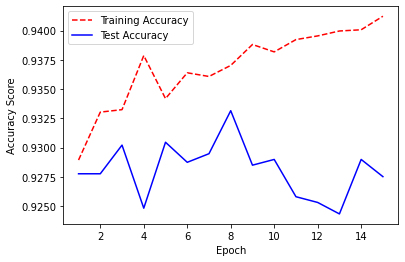

In [105]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

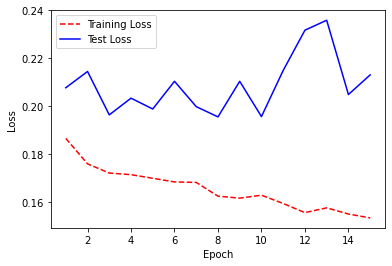

In [104]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [90]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [106]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=4),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# Train neural network
history = network.fit(X_train, cat_y_train, 
                      epochs=15, 
                      callbacks=callbacks,
                      verbose=1, 
                      batch_size=5, 
                      validation_data=(X_test, cat_y_test))

Epoch 1/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1550 - accuracy: 0.9396 - val_loss: 0.2093 - val_accuracy: 0.9305
Epoch 2/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1518 - accuracy: 0.9423 - val_loss: 0.2124 - val_accuracy: 0.9261
Epoch 3/15
1906/1906 [==============================] - 3s 2ms/step - loss: 0.1514 - accuracy: 0.9420 - val_loss: 0.2184 - val_accuracy: 0.9280
Epoch 4/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1479 - accuracy: 0.9436 - val_loss: 0.2158 - val_accuracy: 0.9256
Epoch 5/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.1480 - accuracy: 0.9434 - val_loss: 0.2171 - val_accuracy: 0.9268


# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 20.10 Reducing Overfitting with Dropout

In [108]:
from keras.layers import Dropout

In [112]:
# Set the number of features
number_of_features = 16

# Start neural network
network = Sequential()

# Add a dropout layer for input layer
network.add(Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer w/a ReLU activation function
network.add(Dense(units=100, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(Dropout(0.5))

# Add fully connected layer w/a ReLU activation function
network.add(Dense(units=100, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(Dropout(0.5))

# Add fully connected layer w/a softmax activation function
network.add(Dense(units=7, activation='softmax'))

# Compile neural network
network.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

In [115]:
# Train neural network
history = network.fit(X_train, cat_y_train, 
                      epochs=15, 
#                       callbacks=callbacks,
                      verbose=1, 
                      batch_size=5, 
                      validation_data=(X_test, cat_y_test))

Epoch 1/15
1906/1906 [==============================] - 5s 2ms/step - loss: 0.9805 - accuracy: 0.6357 - val_loss: 0.2872 - val_accuracy: 0.9003
Epoch 2/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4846 - accuracy: 0.8362 - val_loss: 0.2352 - val_accuracy: 0.9167
Epoch 3/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4225 - accuracy: 0.8580 - val_loss: 0.2281 - val_accuracy: 0.9204
Epoch 4/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4023 - accuracy: 0.8601 - val_loss: 0.2321 - val_accuracy: 0.9158
Epoch 5/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.3987 - accuracy: 0.8655 - val_loss: 0.2232 - val_accuracy: 0.9224
Epoch 6/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8722 - val_loss: 0.2190 - val_accuracy: 0.9253
Epoch 7/15
1906/1906 [==============================] - 4s 2ms/step - loss: 0.3707 - accuracy: 0.8784 - val_loss: 0.2193 - val_accuracy:

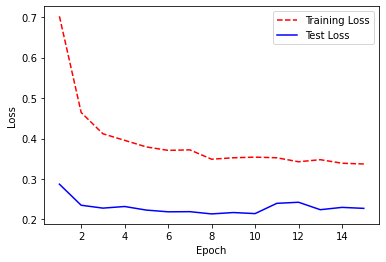

In [117]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

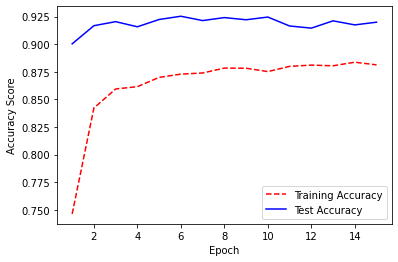

In [118]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

## MLPClassifier

In [34]:
# Load libraries
from sklearn.neural_network import MLPClassifier

In [120]:
# Create an instance of the model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [121]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 11.7 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

### Evaluate model performance

In [39]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
# Get predictions
predictions = mlp.predict(X_test)

In [125]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[364   0  22   0   1   2   6]
 [  0 161   0   0   0   0   0]
 [ 12   0 456   0   5   2   4]
 [  0   0   0 979   0   8  56]
 [  3   0   8   7 555   0  15]
 [  5   0   0  17   0 586  11]
 [  1   0   0  68   4   6 720]]


In [127]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.95      0.95       479
    DERMASON       0.91      0.94      0.93      1043
       HOROZ       0.98      0.94      0.96       588
       SEKER       0.97      0.95      0.96       619
        SIRA       0.89      0.90      0.89       799

    accuracy                           0.94      4084
   macro avg       0.95      0.94      0.95      4084
weighted avg       0.94      0.94      0.94      4084



### Let's tune this mamma-jamma

Round 1: n_iter=10

In [192]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'identity', 'alpha': 0.00030919300466654366, 'early_stopping': True, 'hidden_layer_sizes': (77, 73, 54), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [213]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.93      0.93      0.93       479
    DERMASON       0.93      0.90      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.94      0.95       619
        SIRA       0.84      0.90      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [215]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.00025131854655259604, 'early_stopping': True, 'hidden_layer_sizes': (67, 52, 75), 'learning_rate': 'constant', 'solver': 'adam'}


In [225]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.92      0.94      0.93       479
    DERMASON       0.92      0.92      0.92      1043
       HOROZ       0.97      0.94      0.96       588
       SEKER       0.94      0.95      0.95       619
        SIRA       0.89      0.89      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [227]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001865613092111918, 'early_stopping': True, 'hidden_layer_sizes': (66, 95, 70), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [232]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.94      0.94       479
    DERMASON       0.92      0.93      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.94      0.96      0.95       619
        SIRA       0.89      0.88      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [33]:
# Load libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import random as rd

In [264]:
%%time
mlp_gs = MLPClassifier(max_iter=5000)#, verbose=True)# max_iter=200, 300
parameter_space = {
    'hidden_layer_sizes': [#(rd.randint(10,100),), 
                           #(rd.randint(10,100), rd.randint(10,100)), 
                           (rd.randint(10,100), rd.randint(10,100), rd.randint(10,100))],
    #[(30,), (30,30,30), (50,30), (100,)], #[(10,10,10), (20,20,20), (40,), (50, 30), (500, 150)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'], 
    'solver': ['adam', 'sgd', 'lbfgs'], 
    'alpha': uniform(loc=0, scale=0.0005),
    'learning_rate': ['constant', 'adaptive', 'invscaling'], # only used when solver is 'sgd'
    'early_stopping': [True],
}
rand = RandomizedSearchCV(mlp_gs, parameter_space, random_state=42, n_iter=1000, verbose=1, n_jobs=-1, cv=5)
rand_result = rand.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Wall time: 11h 34min


In [265]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.00012435713629381495, 'early_stopping': True, 'hidden_layer_sizes': (44, 73, 61), 'learning_rate': 'invscaling', 'solver': 'adam'}


Note: 3.5 minutes for `n_iter=10`

In [266]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', 
                    alpha=0.00025,
                    early_stopping=True,
                    hidden_layer_sizes=(67,52,75),
                    learning_rate='constant', 
                    solver='adam')

In [267]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 3.56 s


MLPClassifier(alpha=0.00025, early_stopping=True,
              hidden_layer_sizes=(67, 52, 75), max_iter=5000)

In [268]:
# Get predictions
predictions = mlp.predict(X_test)

In [269]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[364   0  24   0   1   2   4]
 [  0 161   0   0   0   0   0]
 [ 16   0 448   0   9   2   4]
 [  0   0   0 965   1  20  57]
 [  1   0   6   4 566   0  11]
 [  6   0   0  10   0 590  13]
 [  1   0   1  62  10   9 716]]


In [270]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.94      0.94       479
    DERMASON       0.93      0.93      0.93      1043
       HOROZ       0.96      0.96      0.96       588
       SEKER       0.95      0.95      0.95       619
        SIRA       0.89      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [271]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', 
                    alpha=0.00019,
                    early_stopping=True,
                    hidden_layer_sizes=(66,95,70),
                    learning_rate='invscaling', 
                    solver='adam')

In [272]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 3.08 s


MLPClassifier(alpha=0.00019, early_stopping=True,
              hidden_layer_sizes=(66, 95, 70), learning_rate='invscaling',
              max_iter=5000)

In [273]:
# Get predictions
predictions = mlp.predict(X_test)

In [274]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[369   0  21   0   0   1   4]
 [  0 161   0   0   0   0   0]
 [ 15   0 452   0   6   2   4]
 [  0   0   0 960   3  18  62]
 [  4   0   6   4 558   0  16]
 [  9   0   0  11   0 586  13]
 [  2   0   1  61   8   8 719]]


In [275]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.93      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.94      0.94       479
    DERMASON       0.93      0.92      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.95      0.95       619
        SIRA       0.88      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [276]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', # default 'relu'
#                     alpha=0.00019, # default 0.0001
                    early_stopping=True,
                    hidden_layer_sizes=(30,30,30), # default (100,)
#                     learning_rate='invscaling', # default 'constant'
                    solver='adam' # default 'adam'
                   )

In [277]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.46114635
Validation score: 0.669465
Iteration 2, loss = 0.71919209
Validation score: 0.843652
Iteration 3, loss = 0.39760944
Validation score: 0.892970
Iteration 4, loss = 0.29005685
Validation score: 0.908709
Iteration 5, loss = 0.24911067
Validation score: 0.917104
Iteration 6, loss = 0.23309563
Validation score: 0.929696
Iteration 7, loss = 0.22321319
Validation score: 0.930745
Iteration 8, loss = 0.21772076
Validation score: 0.927597
Iteration 9, loss = 0.21338108
Validation score: 0.932844
Iteration 10, loss = 0.20859646
Validation score: 0.929696
Iteration 11, loss = 0.20724808
Validation score: 0.927597
Iteration 12, loss = 0.20424257
Validation score: 0.931794
Iteration 13, loss = 0.20217029
Validation score: 0.929696
Iteration 14, loss = 0.20030702
Validation score: 0.931794
Iteration 15, loss = 0.19734959
Validation score: 0.931794
Iteration 16, loss = 0.19720704
Validation score: 0.933893
Iteration 17, loss = 0.19562307
Validation score: 0.930745
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(30, 30, 30),
              max_iter=5000, verbose=True)

In [278]:
# Get predictions
predictions = mlp.predict(X_test)

In [279]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[365   0  23   0   0   1   6]
 [  0 161   0   0   0   0   0]
 [ 17   0 448   0   8   2   4]
 [  0   0   0 951   1  17  74]
 [  2   0   8   5 559   0  14]
 [  7   0   0  13   0 584  15]
 [  1   0   2  50   9   8 729]]


Defaults:

In [280]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.00012435713629381495, 'early_stopping': True, 'hidden_layer_sizes': (44, 73, 61), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [281]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.93      0.94      0.93       479
    DERMASON       0.93      0.91      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.94      0.95       619
        SIRA       0.87      0.91      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [282]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', # default 'relu'
#                     alpha=0.00019, # default 0.0001
#                     early_stopping=True,
#                     hidden_layer_sizes=(30,30,30), # default (100,)
#                     learning_rate='invscaling', # default 'constant'
                    solver='adam' # default 'adam'
                   )

In [283]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 27.6 s


MLPClassifier(max_iter=5000)

In [284]:
# Get predictions
predictions = mlp.predict(X_test)

In [285]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[362   0  21   0   3   2   7]
 [  0 161   0   0   0   0   0]
 [ 14   0 453   0   6   3   3]
 [  0   0   0 950   2  13  78]
 [  3   0   5   6 562   0  12]
 [  7   0   0   7   0 590  15]
 [  2   0   0  49  11   5 732]]


Defaults:

In [286]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.95      0.95      0.95       479
    DERMASON       0.94      0.91      0.92      1043
       HOROZ       0.96      0.96      0.96       588
       SEKER       0.96      0.95      0.96       619
        SIRA       0.86      0.92      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [287]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', 
                    alpha=0.00019,
#                     early_stopping=True,
                    hidden_layer_sizes=(66,95,70),
                    learning_rate='invscaling', 
                    solver='adam')

In [288]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 33.9 s


MLPClassifier(alpha=0.00019, hidden_layer_sizes=(66, 95, 70),
              learning_rate='invscaling', max_iter=5000)

In [289]:
# Get predictions
predictions = mlp.predict(X_test)

In [290]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[367   0  16   0   2   1   9]
 [  0 161   0   0   0   0   0]
 [ 24   0 442   0   8   2   3]
 [  0   0   0 961   4  20  58]
 [  4   0   4   4 565   0  11]
 [  8   0   0  13   0 585  13]
 [  6   0   1  75  11  12 694]]


In [291]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.93      0.91       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.95      0.92      0.94       479
    DERMASON       0.91      0.92      0.92      1043
       HOROZ       0.96      0.96      0.96       588
       SEKER       0.94      0.95      0.94       619
        SIRA       0.88      0.87      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.92      0.92      0.92      4084



### Got some good starts from random search, now let's take those results and do a grid search

In [293]:
%%time
mlp_gs = MLPClassifier(max_iter=5000)
parameter_space = {
    'hidden_layer_sizes': [(30, 30, 30), (77, 73, 54), (67, 52, 75), (66, 95, 70), (44, 73, 61)],
    'activation': ['identity', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.00031, 0.00025, 0.00019, 0.00012],
    'learning_rate': ['constant', 'invscaling'],
    'early_stopping': [True],
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mlp_gs, parameter_space, verbose=1, n_jobs=-1, cv=5)
grid.fit(X_train, y_train) # X is train samples and y is the corresponding labels

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Wall time: 5h 12min 3s


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=5000), n_jobs=-1,
             param_grid={'activation': ['identity', 'relu'],
                         'alpha': [0.0001, 0.00031, 0.00025, 0.00019, 0.00012],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(30, 30, 30), (77, 73, 54),
                                                (67, 52, 75), (66, 95, 70),
                                                (44, 73, 61)],
                         'learning_rate': ['constant', 'invscaling'],
                         'solver': ['lbfgs', 'adam']},
             verbose=1)

In [294]:
print('Best parameters found:\n', grid.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.00025, 'early_stopping': True, 'hidden_layer_sizes': (77, 73, 54), 'learning_rate': 'constant', 'solver': 'adam'}


In [295]:
from win32com.client import Dispatch
speak = Dispatch("SAPI.SpVoice").Speak

In [296]:
speak("modeling complete")

1

In [299]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', 
                    alpha=0.00025,
#                     early_stopping=True,
                    hidden_layer_sizes=(77, 73, 54),
                    learning_rate='constant', 
                    solver='adam')

In [300]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 46.9 s


MLPClassifier(alpha=0.00025, hidden_layer_sizes=(77, 73, 54), max_iter=5000)

In [301]:
# Get predictions
predictions = mlp.predict(X_test)

In [302]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[364   0  17   1   3   0  10]
 [  0 161   0   0   0   0   0]
 [ 25   0 434   0  13   3   4]
 [  0   0   0 955   2  13  73]
 [  1   0   4   4 565   1  13]
 [  4   0   0  26   0 578  11]
 [  4   0   1  63   5  13 713]]


In [303]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.92      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.95      0.91      0.93       479
    DERMASON       0.91      0.92      0.91      1043
       HOROZ       0.96      0.96      0.96       588
       SEKER       0.95      0.93      0.94       619
        SIRA       0.87      0.89      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [35]:
# Create an instance of the model
mlp = MLPClassifier(max_iter=5000, 
#                     verbose=True,
                    activation='relu', 
                    alpha=0.00025,
                    early_stopping=True,
                    hidden_layer_sizes=(77, 73, 54),
                    learning_rate='constant', 
                    solver='adam')

In [36]:
%%time
# Fit training data to the model
mlp.fit(X_train,y_train)

Wall time: 3.82 s


MLPClassifier(alpha=0.00025, early_stopping=True,
              hidden_layer_sizes=(77, 73, 54), max_iter=5000)

In [37]:
# Get predictions
predictions = mlp.predict(X_test)

In [40]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[367   0  21   0   0   2   5]
 [  0 161   0   0   0   0   0]
 [ 21   0 446   0   5   2   5]
 [  0   0   0 967   1  11  64]
 [  3   0   7   5 558   0  15]
 [  8   0   0  16   0 581  14]
 [  1   0   1  62   7   6 722]]


In [41]:
# Precision / Recall / F1
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.93      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.93      0.94       479
    DERMASON       0.92      0.93      0.92      1043
       HOROZ       0.98      0.95      0.96       588
       SEKER       0.97      0.94      0.95       619
        SIRA       0.88      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

